In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# Reading the CSV file
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
# to understand the type of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [33]:
# some statistics about the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [34]:
# what are the regions that we have in our dataset
df.groupby("region")["age"].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: age, dtype: int64

In [35]:
# changing the string variables into numerical to be prepared for the model

df_bin = df.copy()

# un the sex column, a male get 1 and a female get 0
df_bin["sex_bin"] = df_bin["sex"].map({"male": 1, "female": 0})

# in the smoker column, a yes is 1 and a no is 0
df_bin["smoker_bin"] = df_bin["smoker"].map({"yes": 1, "no": 0})

# every region got a number between 0 and 3 (we have 4 regions in total)
df_bin["region_bin"] = df_bin["region"].map({"northeast": 0, "northwest": 1, "southeast": 2, "southwest": 3})
df_bin.head()

,age,sex,bmi,children,smoker,region,charges,sex_bin,smoker_bin,region_bin
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [36]:
# removing the columns sex, smoker and region beacuse we have the numerical ones
df_bin.drop(["sex", "smoker", "region"], inplace=True, axis=1)
df_bin.head()

,age,bmi,children,charges,sex_bin,smoker_bin,region_bin
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [37]:
# changing the order of the variables
df_bin = df_bin[['age', 'bmi', 'children', 'sex_bin', 'smoker_bin',
       'region_bin', 'charges']]
df_bin.head()

,age,bmi,children,sex_bin,smoker_bin,region_bin,charges
0,19,27.900,0,0,1,3,16884.92400
1,18,33.770,1,1,0,2,1725.55230
2,28,33.000,3,1,0,2,4449.46200
3,33,22.705,0,1,0,1,21984.47061
4,32,28.880,0,1,0,1,3866.85520


In [38]:
w = 0 # Weight
b = 0 # Bias
L = 0.0001 # Learning rate

In [39]:
# The algorithm relies on these two equations:
# w = w - L * derivative_J_w
# b = b - L * derivative_J_b

mse_dict = {} # The key and the value of each element will be respectively the feature and its cost function
param_dict = {} # The key and the value of each element will be respectively the weight and its bias

for column in df_bin[['age', 'bmi', 'children', 'sex_bin', 'smoker_bin', 'region_bin']]:
    
    # let x: BMI and y: Charges
    # the cost function is defined as J(w, b) = (1 / n) * sigma(yi - w * xi - b) where sigma ranges from 1 to 1338
    def cost_function(w, b, df_bin):
        n = len(df_bin)
        J = 0
        for i in range(n):
            x = df_bin.iloc[i][column]
            y = df_bin.iloc[i]["charges"]
        
            J += (y - w * x - b) ** 2
    
        return (1 / n) * J
    
    # The algorithm relies on these two equations:
    # w = w - L * derivative_J_w
    # b = b - L * derivative_J_b
    def gradient_descent(w, b, L, df_bin):
        n = len(df_bin)
        der_J_w = 0
        der_J_b = 0
    
        for i in range(n):
            x = df_bin.iloc[i][column]
            y = df_bin.iloc[i]["charges"]
        
            der_J_w += (-2 / n) * x * (y - w * x - b)
            der_J_b += (-2 / n) * (y - w * x - b)
    
        w_final = w - L * der_J_w
        b_final = b - L * der_J_b
    
        return w_final, b_final

    epochs = 10

    for i in range(epochs):
        w, b = gradient_descent(w, b, L, df_bin)
    
    param_dict[column] = (w, b)
    
    # erreur between the dataset and the predected values
    mse = cost_function(w, b, df_bin)
    mse_dict[column] = mse
print(mse_dict)
print(param_dict)

{'age': 134612281.17183396, 'bmi': 140973539.48851776, 'children': 308347756.7830537, 'sex_bin': 314621062.705973, 'smoker_bin': 314137019.15350276, 'region_bin': 300287287.8719688}
{'age': (324.47252288108564, 8.05349379339386), 'bmi': (418.87370651065936, 11.105029265199775), 'children': (447.5786752925788, 36.655061116883985), 'sex_bin': (461.174154071494, 62.64075038631367), 'smoker_bin': (474.0791089937745, 88.84146277515406), 'region_bin': (510.3876904693454, 113.69549842384686)}


In [40]:
# the feature returned at the end is gonna be the best choice for our model

min_value = mse_dict["age"]
for value in mse_dict.values():
    if min_value > value:
        min_value = value
        
for cle in mse_dict:
    if mse_dict[cle] == min_value:
        feature = cle
        print(f"The column with the lowest cost function is {cle}.")
        break

The column with the lowest cost function is age.


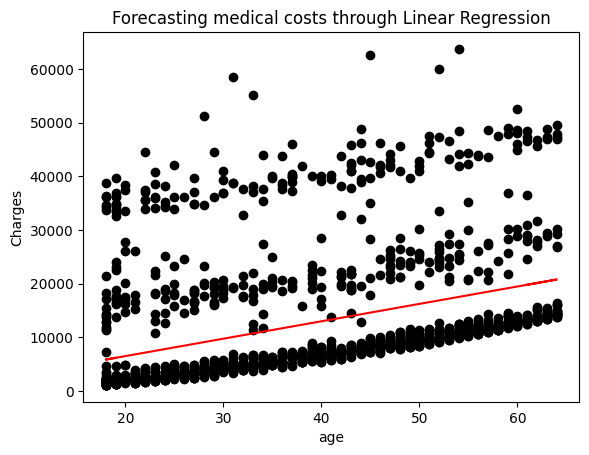

In [41]:
# Visualizing the model
plt.scatter(df[feature], df.charges, color = "black")
plt.xlabel(feature)
plt.ylabel("Charges")
plt.title("Forecasting medical costs through Linear Regression")

plt.plot(list(df_bin[feature]), [param_dict[feature][0] * x + param_dict[feature][1] for x in list(df_bin[feature])], color = "red")

plt.show()